In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
stu = pd.read_csv('dataset/int_student.csv')
stu

,student_id,subject_id,test_id,q1_reaction,q2_reaction,q3_reaction,q4_reaction,q5_reaction,q6_reaction,q7_reaction,...,q23_reaction,q24_reaction,q25_reaction,q26_reaction,q27_reaction,q28_reaction,q29_reaction,q30_reaction,score,grade
0,1157,20100,2002,3,5,3,5,2,1,2,...,6,8,10,9,21,75,330,7,12,5
1,4239,20100,2002,1,4,5,5,2,3,4,...,60,12,8,78,54,37,19,19,18,5
2,1504,20100,2002,1,5,4,4,3,1,1,...,45,13,20,16,60,340,304,24,78,3
3,3197,20100,2002,1,5,5,4,3,1,1,...,45,0,0,0,0,0,0,0,48,5
4,5852,20100,2002,1,5,5,4,3,1,1,...,45,13,20,3,60,682,0,0,72,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88218,522,21150,2110,2,3,1,3,3,2,1,...,6,8,20,29,9,5,0,0,65,5
88219,2897,21150,2110,2,3,1,3,3,2,4,...,6,16,20,29,9,7,0,0,65,5
88220,7061,21150,2110,2,3,1,3,3,2,4,...,6,8,20,0,0,0,0,0,68,5
88221,1241,21150,2110,2,3,1,3,3,2,2,...,6,8,20,29,9,13,136,0,73,5


## 등급별 문항 정답률까지만 구하자.

In [3]:
question = pd.read_csv('dataset/question.csv')
question

,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate
0,20100200201,True,1,1,1,1,2,0.713,False,0.982609,0.995652,0.972973,0.979798,0.526657
1,20100200202,True,4,1,1,5,2,0.756,False,1.000000,0.995652,0.995495,0.994949,0.590058
2,20100200203,True,1,3,1,5,2,0.720,False,1.000000,0.991304,0.959459,0.987374,0.537464
3,20100200204,True,0,2,3,4,3,0.617,False,1.000000,1.000000,0.990991,0.997475,0.353026
4,20100200205,True,1,1,3,3,3,0.524,False,1.000000,0.986957,0.945946,0.924242,0.226225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,21150211026,False,1,3,3,29,4,0.568,False,0.968254,0.894737,0.807692,0.740331,0.385576
1016,21150211027,False,3,3,2,9,4,0.629,False,0.984127,0.932331,0.846154,0.729282,0.477115
1017,21150211028,False,4,1,2,57,4,0.171,False,0.777778,0.421053,0.223077,0.198895,0.055479
1018,21150211029,False,3,1,5,160,4,0.183,False,0.809524,0.466165,0.284615,0.198895,0.054092


### 등급별 정답률 question 에 추가

In [4]:

append_cols = []
for i in range(1,6):
    col = 'g{}_correct_rate'.format(i)
    append_cols.append(col)

append_cols

for col in append_cols:
    question[col]=0'''

'''question['q_id'].dtype
stu['subject_id'].dtype

sub_id = np.unique(stu['subject_id'])
test_id = np.unique(stu['test_id'])

for sub in sub_id:
    for test in test_id:
        is_sub = stu['subject_id'] == sub
        is_test = stu['test_id'] == test
        tmp = stu[is_sub & is_test]
        total = len(tmp)
        if total>1:
            for grade in range(1,6):
                tmp2 = tmp[tmp['grade']==grade]
                g_cnt = len(tmp2)
                if g_cnt == 0:
                    print(sub, test, grade)
                else :
                    for i in range(1,31):
                        qid = sub*1000000 + test*100 + i
                        ans = int(question.loc[question['q_id']==qid,'answer'])
                        react = 'q{}_reaction'.format(i)
                        val = len(tmp2[tmp2[react]==ans])
                        question.loc[question['q_id']==qid,'g{}_correct_rate'.format(grade)]=val/g_cnt
                

"question['q_id'].dtype\nstu['subject_id'].dtype\n\nsub_id = np.unique(stu['subject_id'])\ntest_id = np.unique(stu['test_id'])\n\nfor sub in sub_id:\n    for test in test_id:\n        is_sub = stu['subject_id'] == sub\n        is_test = stu['test_id'] == test\n        tmp = stu[is_sub & is_test]\n        total = len(tmp)\n        if total>1:\n            for grade in range(1,6):\n                tmp2 = tmp[tmp['grade']==grade]\n                g_cnt = len(tmp2)\n                if g_cnt == 0:\n                    print(sub, test, grade)\n                else :\n                    for i in range(1,31):\n                        qid = sub*1000000 + test*100 + i\n                        ans = int(question.loc[question['q_id']==qid,'answer'])\n                        react = 'q{}_reaction'.format(i)\n                        val = len(tmp2[tmp2[react]==ans])\n                        question.loc[question['q_id']==qid,'g{}_correct_rate'.format(grade)]=val/g_cnt\n                "

In [5]:
question

,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate
0,20100200201,True,1,1,1,1,2,0.713,False,0.982609,0.995652,0.972973,0.979798,0.526657
1,20100200202,True,4,1,1,5,2,0.756,False,1.000000,0.995652,0.995495,0.994949,0.590058
2,20100200203,True,1,3,1,5,2,0.720,False,1.000000,0.991304,0.959459,0.987374,0.537464
3,20100200204,True,0,2,3,4,3,0.617,False,1.000000,1.000000,0.990991,0.997475,0.353026
4,20100200205,True,1,1,3,3,3,0.524,False,1.000000,0.986957,0.945946,0.924242,0.226225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,21150211026,False,1,3,3,29,4,0.568,False,0.968254,0.894737,0.807692,0.740331,0.385576
1016,21150211027,False,3,3,2,9,4,0.629,False,0.984127,0.932331,0.846154,0.729282,0.477115
1017,21150211028,False,4,1,2,57,4,0.171,False,0.777778,0.421053,0.223077,0.198895,0.055479
1018,21150211029,False,3,1,5,160,4,0.183,False,0.809524,0.466165,0.284615,0.198895,0.054092


In [12]:
cols = question.columns

In [14]:
cols = cols[9:-4]
cols

Index(['g1_correct_rate', 'g2_correct_rate', 'g3_correct_rate',
       'g4_correct_rate', 'g5_correct_rate'],
      dtype='object')

In [21]:
question[cols] = question[cols].replace(0,np.nan)


In [22]:
for i in range(1,5):
    question['{}_{}_gap'.format(i,i+1)] = question['g{}_correct_rate'.format(i)]-question['g{}_correct_rate'.format(i+1)]

        

In [28]:
cols = question.columns
cols=cols[9:]
cols

Index(['g1_correct_rate', 'g2_correct_rate', 'g3_correct_rate',
       'g4_correct_rate', 'g5_correct_rate', '1_2_gap', '2_3_gap', '3_4_gap',
       '4_5_gap'],
      dtype='object')

### 선별문항선정 & 데이터 가시화

In [188]:
question.sort_values('1_2_gap',ascending=False)[:30]

,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate,1_2_gap,2_3_gap,3_4_gap,4_5_gap,grade
689,21100210630,False,4,2,2,38,4,0.089,True,1.000000,0.253086,0.081897,0.041298,0.007819,0.746914,0.171190,0.040599,0.033479,1
448,20150200629,False,5,2,2,84,4,0.159,False,0.942966,0.345756,0.297143,0.118100,0.027652,0.597210,0.048613,0.179043,0.090448,1
779,21100210930,False,4,2,5,105,4,0.036,True,0.563218,0.062780,0.014085,0.003953,0.000890,0.500438,0.048696,0.010132,0.003063,1
148,20100200629,False,1,3,2,777,4,0.116,False,0.807692,0.333333,0.224199,0.054187,0.008766,0.474359,0.109134,0.170012,0.045422,1
809,21100211030,False,4,2,2,49,4,0.077,False,0.710526,0.250000,0.075472,0.069565,0.012774,0.460526,0.174528,0.005906,0.056791,1
778,21100210929,False,3,1,2,168,4,0.121,True,0.747126,0.327354,0.154930,0.114625,0.025801,0.419772,0.172425,0.040305,0.088824,1
18,20100200219,True,4,1,2,5,4,0.242,False,0.930435,0.513043,0.454955,0.222222,0.111671,0.417391,0.058089,0.232733,0.110551,1
959,21150210830,False,4,3,2,27,4,0.073,False,0.506329,0.089655,NaN,0.042328,0.016667,0.416674,NaN,NaN,0.025661,1
808,21100211029,False,3,1,5,378,4,0.132,False,0.789474,0.375000,0.245283,0.156522,0.016423,0.414474,0.129717,0.088761,0.140098,1
530,20150200921,True,5,1,3,5,4,0.358,True,0.877598,0.466049,0.311943,0.196118,0.185882,0.411549,0.154106,0.115824,0.010236,1


In [191]:
question.sort_values('2_3_gap',ascending=False)[:10]


,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate,1_2_gap,2_3_gap,3_4_gap,4_5_gap,grade
110,20100200521,True,0,2,2,1,4,0.286,True,0.964444,1.000000,0.446194,0.237705,0.110749,-0.035556,0.553806,0.208489,0.126956,2
119,20100200530,False,2,3,4,19,4,0.081,True,0.480000,0.500000,0.089239,0.045082,0.005700,-0.020000,0.410761,0.044157,0.039382,5
920,21150210721,True,4,2,5,1,4,0.167,False,0.821229,0.621762,0.282967,0.141026,0.042827,0.199467,0.338795,0.141941,0.098199,1
500,20150200821,True,4,3,5,5,4,0.289,False,0.844660,0.774648,0.442731,0.304556,0.131698,0.070012,0.331917,0.138175,0.172858,2
748,21100210829,False,2,2,2,8,4,0.199,False,0.916667,0.597403,0.278261,0.139344,0.044974,0.319264,0.319142,0.138917,0.094371,1
507,20150200828,False,3,3,2,284,4,0.173,False,0.694175,0.619718,0.310573,0.161871,0.037239,0.074456,0.309146,0.148702,0.124632,2
807,21100211028,False,1,3,2,608,4,0.319,False,0.894737,0.861111,0.553459,0.278261,0.147810,0.033626,0.307652,0.275198,0.130451,2
25,20100200226,False,0,1,3,17,4,0.207,False,0.913043,0.721739,0.432432,0.224747,0.021614,0.191304,0.289307,0.207685,0.203134,1
88,20100200429,False,0,2,2,250,4,0.130,False,0.810526,0.515789,0.234783,0.088384,0.011382,0.294737,0.281007,0.146399,0.077002,1
237,20100200928,False,1,1,2,75,4,0.235,True,0.990291,0.738938,0.470000,0.225627,0.055978,0.251353,0.268938,0.244373,0.169649,1


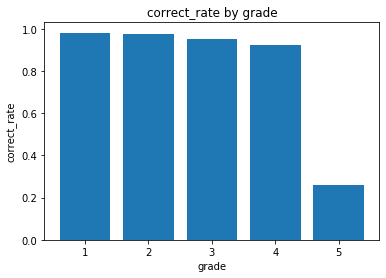

In [223]:
for_plt = question.sort_values('4_5_gap',ascending=False)[:20]
for_plt
for_plt = for_plt.reset_index(drop=True)
for_plt

y = for_plt.loc[3,cols[:-4]]
plt.bar(['1','2','3','4','5'],y)
plt.ylabel('correct_rate')
plt.xlabel('grade')
plt.title('correct_rate by grade')
#plt.title('19년도 수학 나형 21번 문항')
plt.show()

In [193]:
question.sort_values('3_4_gap',ascending=False)[:20]

,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate,1_2_gap,2_3_gap,3_4_gap,4_5_gap,grade
350,20150200321,True,4,3,2,4,4,0.383,False,0.976654,0.721689,0.691275,0.382716,0.208837,0.254965,0.030414,0.308559,0.173879,1
58,20100200329,False,4,1,3,48,4,0.260,False,0.909836,0.740113,0.572034,0.267677,0.060631,0.169723,0.168079,0.304357,0.207046,1
206,20100200827,False,4,1,3,80,4,0.338,False,0.945701,0.923077,0.687500,0.389952,0.113128,0.022624,0.235577,0.297548,0.276824,2
49,20100200320,True,0,2,5,3,4,0.510,False,0.991803,0.926554,0.923729,0.633838,0.278239,0.065250,0.002825,0.289890,0.355599,3
27,20100200228,False,1,1,3,340,4,0.261,False,0.973913,0.778261,0.644144,0.358586,0.026657,0.195652,0.134117,0.285558,0.331929,1
616,21100210217,True,1,2,3,1,4,0.399,False,0.959596,0.870000,0.759091,0.481481,0.196896,0.089596,0.110909,0.277609,0.284585,2
807,21100211028,False,1,3,2,608,4,0.319,False,0.894737,0.861111,0.553459,0.278261,0.147810,0.033626,0.307652,0.275198,0.130451,2
118,20100200529,False,3,2,5,84,4,0.373,True,0.915556,0.722222,0.711286,0.446721,0.148208,0.193333,0.010936,0.264565,0.298513,1
266,20100201027,False,0,2,3,34,4,0.277,False,0.959677,0.703911,0.591398,0.335749,0.067939,0.255767,0.112513,0.255649,0.267810,1
358,20150200329,False,3,2,3,327,4,0.294,False,0.972763,0.595010,0.597315,0.343915,0.106512,0.377753,-0.002306,0.253400,0.237404,1


In [106]:
question.sort_values('4_5_gap',ascending=False)[:19]

,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate,1_2_gap,2_3_gap,3_4_gap,4_5_gap
4,20100200205,True,1,1,3,3,3,0.524,False,1.000000,0.986957,0.945946,0.924242,0.226225,0.013043,0.041011,0.021704,0.698018
10,20100200211,True,0,2,3,1,3,0.584,False,1.000000,1.000000,0.995495,0.979798,0.301153,0.000000,0.004505,0.015698,0.678645
22,20100200223,False,0,2,3,45,3,0.579,False,0.965217,0.995652,0.972973,0.974747,0.301873,-0.030435,0.022679,-0.001775,0.672874
6,20100200207,True,2,2,3,1,3,0.544,False,0.982609,0.978261,0.950450,0.924242,0.261527,0.004348,0.027810,0.026208,0.662715
24,20100200225,False,4,1,3,20,3,0.480,False,0.982609,0.969565,0.882883,0.845960,0.188761,0.013043,0.086682,0.036923,0.657199
21,20100200222,False,3,2,1,4,3,0.615,False,1.000000,1.000000,0.990991,1.000000,0.349424,0.000000,0.009009,-0.009009,0.650576
3,20100200204,True,0,2,3,4,3,0.617,False,1.000000,1.000000,0.990991,0.997475,0.353026,0.000000,0.009009,-0.006484,0.644449
26,20100200227,False,1,3,3,60,4,0.414,False,0.973913,0.939130,0.878378,0.747475,0.111671,0.034783,0.060752,0.130904,0.635803
15,20100200216,True,1,3,2,5,4,0.571,False,1.000000,0.978261,0.963964,0.929293,0.303314,0.021739,0.014297,0.034671,0.625979
23,20100200224,False,1,1,3,13,3,0.399,False,0.913043,0.947826,0.846847,0.722222,0.102305,-0.034783,0.100979,0.124625,0.619917


In [171]:
len(question[(question['2_3_gap']>0.1)& (question['g2_correct_rate']>0.5) &(question['g3_correct_rate']<0.5)])

28

In [165]:
question['grade'] = 5

### 선별 문항 선정2

In [180]:
for i in range(1,5):
    print(len(question[(question['{}_{}_gap'.format(i,i+1)]>0.1) & (question['g{}_correct_rate'.format(i)]>0.5) & 
             (question['g{}_correct_rate'.format(i+1)]<0.5)]))

42
28
41
149


In [ ]:
for i in range(1,5):
    question.loc[(question['{}_{}_gap'.format(i,i+1)]>0.1) & (question['g{}_correct_rate'.format(i)]>0.5) & (question['g{}_correct_rate'.format(i+1)]<0.5),
                 'grade'] = i

In [167]:
for i in range(1,5):
    print(len(question[question['grade']==i]))

137
52
63
391


### 모델 로드

In [89]:
model = keras.Sequential()

#timestep = k, k개의 데이터(시간)마다 값이 1개
model.add(layers.Bidirectional(layers.LSTM(6),input_shape = (None,6)))
'''model.add(layers.Dense(40,activation = 'relu'))
model.add(layers.Dense(80,activation = 'relu'))
model.add(layers.Dense(160,activation = 'relu'))
model.add(layers.Dense(80,activation = 'relu'))
model.add(layers.Dense(40,activation = 'relu'))'''
#model.add(layers.Dense(20,activation = 'relu'))
model.add(layers.Dense(6,activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 12)                624       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________


In [90]:
model = keras.models.load_model('dataset/model_simple_layers.h5')

In [187]:
for_pred = [
            [5,2,2,84,0.159,1],
            [4,2,2,25,0.089,0],
            [4,2,5,105,0.036,1],
            [4,2,2,38,0.089,1],
           ]
ll = len(for_pred)

val = model.predict(np.array(for_pred).reshape(1,ll,6))
print(val)
print(np.argmax(val))


[[5.4150388e-07 7.3170871e-01 1.0985993e-01 1.5838496e-01 4.5910365e-05
  8.7045059e-11]]
1


In [118]:
question.sort_values(['2_3_gap','1_2_gap'],ascending=False)[:10]

,q_id,answer_type,part_L,part_M,part_S,answer,score,correct_rate,viewable,g1_correct_rate,g2_correct_rate,g3_correct_rate,g4_correct_rate,g5_correct_rate,1_2_gap,2_3_gap,3_4_gap,4_5_gap
110,20100200521,True,0,2,2,1,4,0.286,True,0.964444,1.000000,0.446194,0.237705,0.110749,-0.035556,0.553806,0.208489,0.126956
119,20100200530,False,2,3,4,19,4,0.081,True,0.480000,0.500000,0.089239,0.045082,0.005700,-0.020000,0.410761,0.044157,0.039382
920,21150210721,True,4,2,5,1,4,0.167,False,0.821229,0.621762,0.282967,0.141026,0.042827,0.199467,0.338795,0.141941,0.098199
500,20150200821,True,4,3,5,5,4,0.289,False,0.844660,0.774648,0.442731,0.304556,0.131698,0.070012,0.331917,0.138175,0.172858
748,21100210829,False,2,2,2,8,4,0.199,False,0.916667,0.597403,0.278261,0.139344,0.044974,0.319264,0.319142,0.138917,0.094371
507,20150200828,False,3,3,2,284,4,0.173,False,0.694175,0.619718,0.310573,0.161871,0.037239,0.074456,0.309146,0.148702,0.124632
807,21100211028,False,1,3,2,608,4,0.319,False,0.894737,0.861111,0.553459,0.278261,0.147810,0.033626,0.307652,0.275198,0.130451
25,20100200226,False,0,1,3,17,4,0.207,False,0.913043,0.721739,0.432432,0.224747,0.021614,0.191304,0.289307,0.207685,0.203134
88,20100200429,False,0,2,2,250,4,0.130,False,0.810526,0.515789,0.234783,0.088384,0.011382,0.294737,0.281007,0.146399,0.077002
237,20100200928,False,1,1,2,75,4,0.235,True,0.990291,0.738938,0.470000,0.225627,0.055978,0.251353,0.268938,0.244373,0.169649


In [186]:
for_pred = [[0,2,2,1,0.286,1],
            [2,2,2,8,0.199,1],
            [4,3,5,5,0.289,1],
           ]
ll = len(for_pred)

val = model.predict(np.array(for_pred).reshape(1,ll,6))
print(val)
print(np.argmax(val))


[[1.7877155e-11 1.4727315e-01 8.4049273e-01 1.2233587e-02 5.6613908e-07
  3.7033192e-14]]
2


In [ ]:
for_pred = [trys for trys in pre_selected_trys['student_id']==]
ll = len(for_pred)

val = model.predict(np.array(for_pred).reshape(1,ll,6))
print(val)
print(np.argmax(val))


## 정답의 크기에 지나치게 영향을 받는 모습 발견 -> ~~모델 재학습~~ -> simple_layer 모델로 해결

## 초기의 가설 = 복잡한 레이어 구조가 좋지 않을 것이다.

## 여러가지 모델 구조를 가지고 살펴본 결과 가설이 맞았음

### 등급컷 관련 오류 수정 & 저장부분

In [140]:
'''is_sub = stu['subject_id'] == 20150
is_test = stu['test_id'] == 2009

delimeters = [92,84,78,69]
stu.loc[is_sub & is_test,'grade']=5
for i in range(1,5):
    stu.loc[is_sub & is_test & (stu['score']>= delimeters[i-1]) & (stu['grade']==5),'grade'] = i

question.to_csv('dataset/question.csv',index=False)

delimeters

is_sub = stu['subject_id'] == 20150
is_test = stu['test_id'] == 2009
rev = stu[is_sub & is_test]

for i in range(1,5):
    print(len(rev[rev['grade']==i]))

#등급컷 오류 부분 수정
#stu.to_csv('dataset/int_student.csv',index=False)

delimeters'''

"is_sub = stu['subject_id'] == 20150\nis_test = stu['test_id'] == 2009\n\ndelimeters = [92,84,78,69]\nstu.loc[is_sub & is_test,'grade']=5\nfor i in range(1,5):\n    stu.loc[is_sub & is_test & (stu['score']>= delimeters[i-1]) & (stu['grade']==5),'grade'] = i\n\nquestion.to_csv('dataset/question.csv',index=False)\n\ndelimeters\n\nis_sub = stu['subject_id'] == 20150\nis_test = stu['test_id'] == 2009\nrev = stu[is_sub & is_test]\n\nfor i in range(1,5):\n    print(len(rev[rev['grade']==i]))\n\n#등급컷 오류 부분 수정\n#stu.to_csv('dataset/int_student.csv',index=False)\n\ndelimeters"

## model_test

In [142]:
tmp_ary = np.unique(stu['student_id'])

sids = []

for sid in tmp_ary:
    gr = np.unique(stu.loc[stu['student_id']==sid,'grade'])
    if len(gr)==1:
        sids.append(sid)

In [143]:
len(sids), len(tmp_ary)

(4706, 14060)